# Step 1: Exploring the Shapefile
This notebook walks through loading and examining the shapefile located at `tutorial/step_1/mt_sid_boulder_epsg5071.shp`.

We’ll use `geopandas` to load and display the shapefile, review its attributes, and inspect its EPSG code to confirm the projection.

## 1. Load Necessary Libraries
To work with geospatial data, we’ll primarily use `geopandas` along with `matplotlib` for visualization.

In [2]:
import os
# Import the necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt

# Set matplotlib to display inline
%matplotlib inline

## 2. Load the Shapefile
Using `geopandas`, we can load the shapefile and inspect its structure. It contains data clipped from the Montana [Statewide Irrigation Dataset](https://mslservices.mt.gov/Geographic_Information/Data/DataList/datalist_Details.aspx?did=%7Bf33bc611-8d4e-4d92-ae99-49762dec888b%7D).


In [3]:
# Load the shapefile
print(os.getcwd())

home = os.path.expanduser('~')
root = os.path.abspath('../..')

shapefile_path = os.path.join(root, '1_Boulder', 'data', 'gis', 'mt_sid_boulder.shp')
gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame to examine structure and attributes
gdf.head()
print(gdf.shape[0], 'fields')

/home/dgketchum/code/swim-rs/examples/1_Boulder/step_1_domain
78 fields


## 3. Display the Shapefile Geometry
Now, we’ll plot the shapefile to get a visual overview of the spatial data it contains.

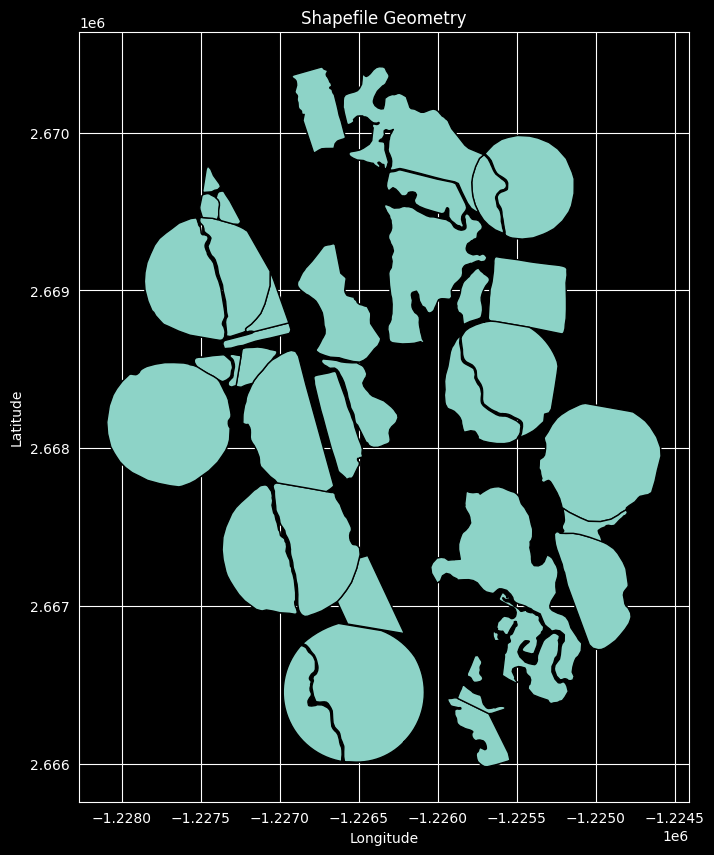

In [4]:
# Plot the shapefile geometries
gdf.plot(figsize=(10, 10), edgecolor='black')
plt.title('Shapefile Geometry')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## 4. Check the EPSG Code
To confirm the projection, we’ll display the EPSG code of the shapefile. We want the projection for the project in Albers Equal Area, so I reprojected the SID into 5071 in a GIS.

In [5]:
# Display the EPSG code
epsg_code = gdf.crs
print(f"EPSG Code: {epsg_code}")

EPSG Code: EPSG:5071


## 5. List the Attributes (Fields) in the Shapefile
List all fields (attributes) within the shapefile to see the available data. There is valuable information, though we only really need a unique ID, for which we can use 'FID_1'.

In [6]:
# List attribute fields
attributes = gdf.columns
print('Attributes in shapefile:')
for attribute in attributes:
    print(attribute)

Attributes in shapefile:
FID_1
SOURCECODE
COUNTY_NO
COUNTYNAME
ITYPE
USAGE
MAPPEDBY
New_Acres
STATE
geometry


## Display Shapefile with a Basemap

In this cell, we will load the shapefile and plot it with a basemap for better geographical context. To add the basemap, we use `contextily`, which provides tiles from various web-based map providers.

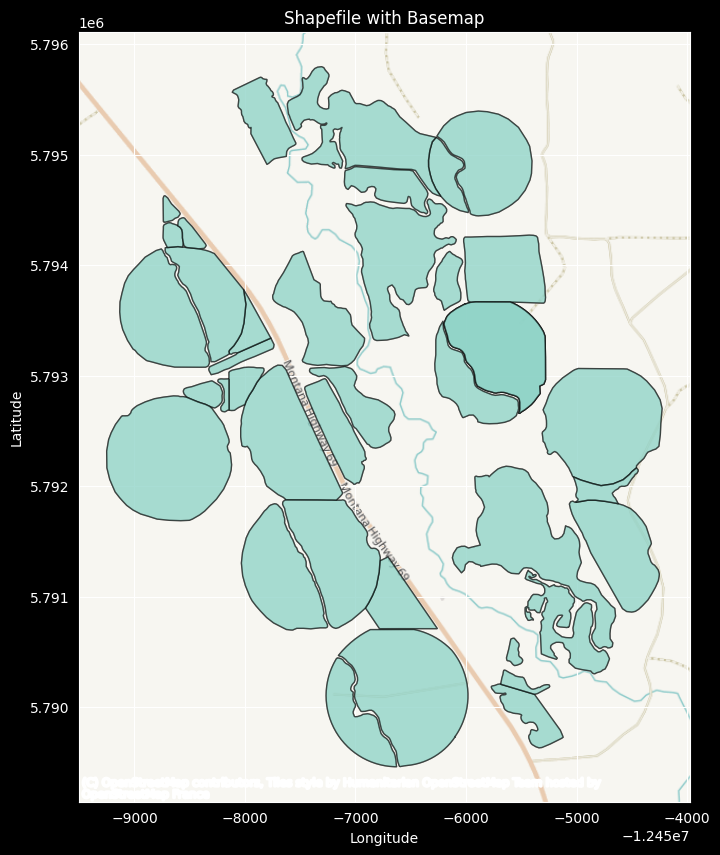

In [7]:
import contextily as ctx

# Check if the shapefile's CRS is in meters (projected); contextily basemaps are in Web Mercator (EPSG:3857)
if gdf.crs.to_string() != 'EPSG:3857':
    gdf = gdf.to_crs(epsg=3857)  # Reproject to Web Mercator if needed

# Plot the shapefile with a basemap
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', alpha=0.5)

# Add basemap using contextily
ctx.add_basemap(ax)

# Add labels and show plot
plt.title("Shapefile with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Finally, we'll just set up some extra directories to put data in as we work through the tutorial.

In [8]:
data_dir = os.path.join(root, '1_Boulder', 'data')
dirs = ['snodas',
        'properties',
        'landsat',
        'bias_correction_tif',
        'gis',
        'met_timeseries',
        'plot_timeseries']

dir_paths = [os.path.join(data_dir, d) for d in dirs]
[os.makedirs(d, exist_ok=True) for d in dir_paths]

[None, None, None, None, None, None, None]